In [ ]:
import numpy as np
import pandas as pd
import torch.nn
from tqdm.notebook import tqdm
import torch.nn as nn


In [ ]:
df=pd.read_csv('100計數_地段率.csv',encoding='UTF-8')

In [ ]:
df

,id,left,top,right,bottom,活動中心數量,郵局數量,公車站數量,火車站數量,加油站數量,...,食物數量,診所數量,醫院數量,禮品百貨數量,觀光景點數量,房屋稅數量,地段率總和,折舊年數總和,平均地段率,平均折舊年數
1,1.337324e+07,2.635136e+06,1.337329e+07,2.635086e+06,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,NaN,NaN
2,1.337324e+07,2.635086e+06,1.337329e+07,2.635036e+06,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,NaN,NaN
3,1.337324e+07,2.635036e+06,1.337329e+07,2.634986e+06,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,NaN,NaN
4,1.337324e+07,2.634986e+06,1.337329e+07,2.634936e+06,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,NaN,NaN
5,1.337324e+07,2.634936e+06,1.337329e+07,2.634886e+06,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74162,1.338634e+07,2.621286e+06,1.338639e+07,2.621236e+06,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,NaN,NaN
74163,1.338634e+07,2.621236e+06,1.338639e+07,2.621186e+06,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,NaN,NaN
74164,1.338634e+07,2.621186e+06,1.338639e+07,2.621136e+06,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,NaN,NaN
74165,1.338634e+07,2.621136e+06,1.338639e+07,2.621086e+06,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,NaN,NaN


In [ ]:
data=np.zeros((141,132,28))
label=np.zeros((141,132,1))
for x in range(len(data)):
    for y in range(len(data[0])):
        id=141*y+x
        datadict={
            0:'活動中心數量',
            1:'郵局數量',
            2:'公車站數量',
            3:'火車站數量',
            4:'加油站數量',
            5:'停車場數量',
            6:'腳踏車站點數量',
            7:'寺廟數量',
            8:'大賣數量',
            9:'服飾數量',
            10:'便利商店數量',
            11:'超市美妝數量',
            12:'電子賣場數量',
            13:'銀行數量',
            14:'ATM數量',
            15:'大學數量',
            16:'高中數量',
            17:'國小數量',
            18:'國中數量',
            19:'補習班數量',
            20:'嫌惡設施_危險數量',
            21:'嫌惡設施_殯葬數量',
            22:'嫌惡設施_髒亂數量',
            23:'食物數量',
            24:'診所數量',
            25:'醫院數量',
            26:'禮品百貨數量',
            27:'觀光景點數量',
        }
        label[x][y][0]=df.iloc[id]['平均地段率']
        for i in range(28):
            data[x][y][i]=df.iloc[id][datadict[i]]


In [ ]:
##model data
from tqdm import trange


validnum=len(df[df['平均地段率']>0.1])
validdata=np.zeros((len(df[df['平均地段率']>0.1]),28,11,11))
validlabel=np.zeros((len(df[df['平均地段率']>0.1]),1))
counter=0
for y in trange(len(data[0])):
    for x in range(len(data)):
        if label[x][y][0]>0.5:
            for i in range(28):
                tempx=x-5
                tempy=y-5
                for a in range(11):
                    for b in range(11):
                        try:
                            validdata[counter][i][a][b]+=data[tempx+a][tempy+b][i]
                        except:
                            continue
            validlabel[counter][0]=label[x][y][0]-80    
            counter=counter+1



            

100%|██████████| 132/132 [00:04<00:00, 28.75it/s]


In [ ]:
#real data(all)

from tqdm import trange

realdata=np.zeros((len(df['id']),28,11,11))
reallabel=np.zeros((len(df['id']),1))
counter=0
for y in trange(len(data[0])):
    for x in range(len(data)):
        for i in range(28):
            tempx=x-5
            tempy=y-5
            for a in range(11):
                for b in range(11):
                    try:
                        realdata[counter][i][a][b]+=data[tempx+a][tempy+b][i]
                    except:
                        continue
        reallabel[counter][0]=label[x][y][0]-80    
        counter=counter+1

100%|██████████| 132/132 [00:32<00:00,  4.02it/s]


In [ ]:
print(validlabel)

[[40.]
 [50.]
 [34.]
 ...
 [20.]
 [20.]
 [20.]]


In [ ]:
from torch.utils.data import Dataset, DataLoader
class ExampleDataset(Dataset):

    # data loading
    def __init__(self,tr,target, length):
        
        self.x = tr.astype(np.float32)
        self.y = target.astype(np.float32)
        self.n_samples = length

    # working for indexing
    def __getitem__(self, index):
        
        return self.x[index], self.y[index]

    # return the length of our dataset
    def __len__(self):
        
        return self.n_samples

In [ ]:
tr0_set=ExampleDataset(validdata,validlabel,len(validdata))
dataloader = DataLoader(tr0_set, batch_size=20, shuffle=True)

In [ ]:
import torch.nn as nn
class NeuralNet(nn.Module):
    ''' A simple fully-connected deep neural network '''
    def __init__(self):
        super(NeuralNet, self).__init__()
        self.cv2_1=nn.Conv2d(28, 64, 3, stride=1)
        self.cv2_2=nn.Conv2d(64, 128, 3, stride=1)
        self.cv2_3=nn.Conv2d(128, 64, 3, stride=1)

        self.layer1 = nn.Linear(5*5*64, 128)
        self.layer2 = nn.Linear(128, 32)
        self.out = nn.Linear(32, 1) 

        self.ba1=nn.BatchNorm1d(256)
        self.ba2=nn.BatchNorm1d(128)

        self.act_fn1 = nn.ReLU()
        self.act_fn2 = nn.ReLU()
        self.act_fn3 = nn.ReLU()
        self.act_fn4 = nn.ReLU()
        # Define your neural network here
        # TODO: How to modify this model to achieve better performance?
        # self.net = nn.Sequential(
        #     nn.Linear(22*48, 1024),
        #     nn.ReLU(),
        #     nn.BatchNorm1d(1024),
        #     nn.Linear(1024, 512),
        #     nn.ReLU(),
        #     nn.BatchNorm1d(512),
        #     nn.Linear(512, 256),
        #     nn.ReLU(),
        #     nn.BatchNorm1d(256),
        #     nn.Linear(256, 128),
        #     nn.ReLU(),
        #     nn.BatchNorm1d(128),
        #     nn.Linear(128, 64),
        #     nn.ReLU(),
        #     nn.Linear(64, 48)
        # )

        # Mean squared error loss
        self.criterion = nn.MSELoss(reduction='mean')

    def forward(self, x):
        ''' Given input of size (batch_size x input_dim), compute output of the network '''
        x=self.cv2_1(x)
        x = self.act_fn1(x)        
        x=self.cv2_2(x)
        x = self.act_fn2(x)   
        x=self.cv2_3(x)
        x = self.act_fn3(x) 
        x=x.view(-1,5*5*64)
        x = self.layer1(x)
        x = self.layer2(x)
        out = self.out(x)
        return out

    def cal_loss(self, pred, target):
        ''' Calculate loss '''
        # TODO: you may implement L1/L2 regularization here
        lamb = 0.0003
        if lamb :
          l2_reg = torch.tensor(0.).to('cuda')
          for param in self.parameters() :
            l2_reg += torch.norm(param)
          return self.criterion(pred, target) + l2_reg*lamb
        else : 
          return self.criterion(pred, target)

In [ ]:
import torch.optim as optim

def train(tr_set, model, device):
    ''' DNN training '''
    criterion = nn.MSELoss() 
    n_epochs = 150  # Maximum number of epochs
    best_acc = 0.0
    # Setup optimizer
    optimizer = optim.Adam(model.parameters(), lr=1E-4,weight_decay=0.00002)   

    min_mse = 1000.
    loss_record = {'train': [], 'dev': []}      # for recording training loss
    early_stop_cnt = 0
    epoch = 0
    while epoch < n_epochs:
        train_acc = 0.0
        train_loss = 0.0
        val_acc = 0.0
        val_loss = 0.0
        model.train()                           # set model to training mode
        for x, y in tr_set:                     # iterate through the dataloader
            optimizer.zero_grad()               # set gradient to zero
            x, labels = x.to(device), y.to(device)   # move data to device (cpu/cuda)
            outputs = model(x)                     # forward pass (compute output)
            mse_loss = criterion(outputs, labels)  # compute loss
            _, train_pred = torch.max(outputs, 1)
            mse_loss.backward()                 # compute gradient (backpropagation)
            optimizer.step()                    # update model with optimizer
            train_acc += (train_pred == torch.max(labels)).sum().item()
            train_loss += mse_loss.item()

        # After each epoch, test your model on the validation (development) set.
        
            torch.save(model.state_dict(), "./model.pth")

        loss_record['train'].append(train_loss/tr_set)
        print('[{:03d}/{:03d}] Train Acc: {:3.6f} Loss: {:3.6f} |'.format(
                epoch + 1, n_epochs, train_acc/len(tr0_set), train_loss/len(tr_set)
            ))
        epoch += 1
        
    # if not validating, save the last epoch

    return min_mse, loss_record

In [ ]:
model = NeuralNet().to('cuda')  # Construct model and move to device
model_loss, model_loss_record = train(dataloader, model, 'cuda')

[001/150] Train Acc: 0.000000 Loss: 766.950607 |
[002/150] Train Acc: 0.000000 Loss: 118.686681 |
[003/150] Train Acc: 0.000000 Loss: 81.566137 |
[004/150] Train Acc: 0.000000 Loss: 74.343760 |
[005/150] Train Acc: 0.000000 Loss: 71.914954 |
[006/150] Train Acc: 0.000000 Loss: 67.014019 |
[007/150] Train Acc: 0.000000 Loss: 64.720859 |
[008/150] Train Acc: 0.000000 Loss: 62.267790 |
[009/150] Train Acc: 0.000000 Loss: 60.611921 |
[010/150] Train Acc: 0.000000 Loss: 59.418703 |
[011/150] Train Acc: 0.000000 Loss: 58.494935 |
[012/150] Train Acc: 0.000000 Loss: 56.127179 |
[013/150] Train Acc: 0.000000 Loss: 54.218912 |
[014/150] Train Acc: 0.000000 Loss: 53.921647 |
[015/150] Train Acc: 0.000000 Loss: 52.206495 |
[016/150] Train Acc: 0.000000 Loss: 50.523583 |
[017/150] Train Acc: 0.000000 Loss: 50.331920 |
[018/150] Train Acc: 0.000000 Loss: 48.681572 |
[019/150] Train Acc: 0.000000 Loss: 47.864578 |
[020/150] Train Acc: 0.000000 Loss: 45.946016 |
[021/150] Train Acc: 0.000000 Loss: 45

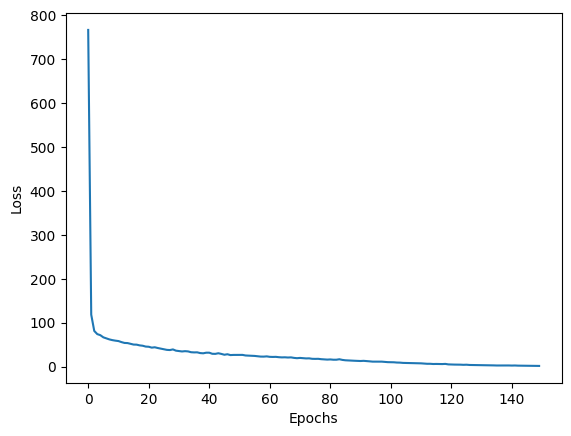

In [ ]:


import matplotlib.pyplot as plt
plt.ion()

fig = plt.figure()
plt.plot(model_loss_record['train'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

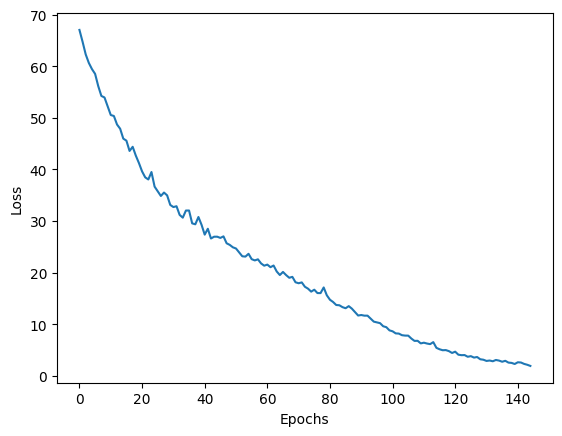

In [ ]:
import matplotlib.pyplot as plt

plt.ion()

fig = plt.figure()
plt.plot(model_loss_record['train'][5:])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()
fig.savefig('train100loss.jpg')

In [ ]:

def test(tt_set, model, device):
    model.eval()                                # set model to evalutation mode
    preds = []
    for x in tt_set:                            # iterate through the dataloader
        x = x.to(device)                        # move data to device (cpu/cuda)
        with torch.no_grad():                   # disable gradient calculation
            pred = model(x)                     # forward pass (compute output)
            preds.append(pred.detach().cpu())   # collect prediction
    preds = torch.cat(preds, dim=0).numpy()     # concatenate all predictions and convert to a numpy array
    return preds



model = NeuralNet().to('cuda')
ckpt = torch.load('./model1.pth', map_location='cpu')  # Load your best model
model.load_state_dict(ckpt)
tt_set = DataLoader(realdata.astype(np.float32), batch_size=1, shuffle=False)
preds = test(tt_set, model, 'cuda')  # predict COVID-19 cases with your model
for i in range(0,100):
    print("實際值:",reallabel[i],"預測結果:",preds[i])

實際值: [nan] 預測結果: [34.41681]
實際值: [nan] 預測結果: [34.41681]
實際值: [nan] 預測結果: [34.41681]
實際值: [nan] 預測結果: [34.41681]
實際值: [nan] 預測結果: [34.41681]
實際值: [nan] 預測結果: [34.41681]
實際值: [nan] 預測結果: [34.41681]
實際值: [nan] 預測結果: [34.41681]
實際值: [nan] 預測結果: [34.41681]
實際值: [nan] 預測結果: [34.741776]
實際值: [nan] 預測結果: [38.782387]
實際值: [nan] 預測結果: [45.035313]
實際值: [nan] 預測結果: [51.979324]
實際值: [nan] 預測結果: [57.19223]
實際值: [nan] 預測結果: [51.008278]
實際值: [nan] 預測結果: [42.99515]
實際值: [nan] 預測結果: [37.18425]
實際值: [nan] 預測結果: [39.389683]
實際值: [nan] 預測結果: [31.698011]
實際值: [nan] 預測結果: [27.245302]
實際值: [nan] 預測結果: [30.042192]
實際值: [nan] 預測結果: [34.370422]
實際值: [nan] 預測結果: [34.41681]
實際值: [nan] 預測結果: [34.41681]
實際值: [nan] 預測結果: [34.41681]
實際值: [nan] 預測結果: [34.41681]
實際值: [nan] 預測結果: [34.41681]
實際值: [nan] 預測結果: [34.41681]
實際值: [nan] 預測結果: [34.41681]
實際值: [nan] 預測結果: [34.41681]
實際值: [nan] 預測結果: [34.41681]
實際值: [nan] 預測結果: [34.41681]
實際值: [nan] 預測結果: [34.41681]
實際值: [nan] 預測結果: [34.41681]
實際值: [nan] 預測結果: [34.41681]
實際值: [nan]

In [ ]:
import math
err=[]
pred=[]
for i in range(len(preds)):
    ##err.append(abs(preds[i][0]-reallabel[i][0]))
    pred.append(preds[i][0]+80)


In [ ]:
print(len(pred))

2671


In [ ]:

df['預測值']=pred
df.to_csv('result100all.csv')